In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
# X = [[1,1], [1,0], [2,0], [2,4], [3,5]]
X = [[100,5], [90,5], [110,5], [97,4], [102,4], [112,4], [92,4], [95,3], [90,3], [100,3],
     [110,5], [100,5], [110,4], [93,3], [107,2], [117,3], [96,2], [105,3], [100,3], [110,3],
     [60,-1], [70,-1],[40,1], [70,-3], [50,-1], [80,0],[50,0],[60,-1],[60,1],[55,0],
     [40,-1], [45,-1],[40,0], [55,-3], [60,-1], [65,0],[70,0],[51,-2],[51,1],[48,0]]

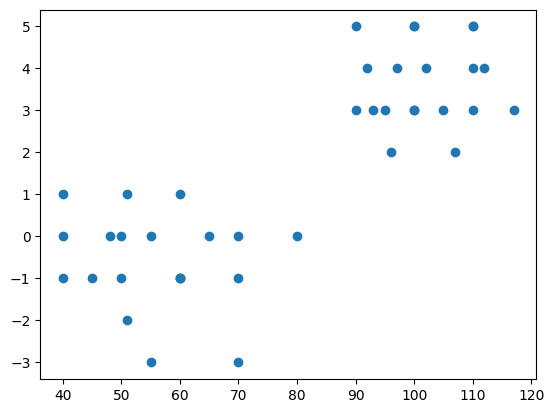

In [3]:
xpoints = []
ypoints = []

for i in range(len(X)):
  xpoints.append(X[i][0])
  ypoints.append(X[i][1])

plt.scatter(xpoints, ypoints)
plt.show()

In [4]:
def initialize_centroids(data, k):
  if k > len(data):
    print("K should be less than data points")
    return None
  else:
    centriods = random.sample(data, k)
    return centriods

In [5]:
def get_distance(p1, p2):
  return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

def create_cluster(data, centroids):
  clusters = []
  for point in data:
        distances = [get_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters.append(cluster_index)

  return clusters

In [6]:
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        print(cluster_points)
        if cluster_points:
            new_centroid = [sum(point[i] for point in cluster_points) / len(cluster_points) for i in range(len(data[0]))]
            new_centroids.append(new_centroid)
    return new_centroids

In [7]:
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        clusters = create_cluster(data, centroids)
        new_centroids = update_centroids(data, clusters, k)

        if centroids == new_centroids:
            break

        centroids = new_centroids

    return centroids, clusters

[[100, 5], [90, 5], [97, 4], [102, 4], [92, 4], [95, 3], [90, 3], [100, 3], [100, 5], [93, 3], [96, 2], [100, 3], [60, -1], [70, -1], [40, 1], [70, -3], [50, -1], [80, 0], [50, 0], [60, -1], [60, 1], [55, 0], [40, -1], [45, -1], [40, 0], [55, -3], [60, -1], [65, 0], [70, 0], [51, -2], [51, 1], [48, 0]]
[[110, 5], [112, 4], [110, 5], [110, 4], [107, 2], [117, 3], [105, 3], [110, 3]]
[[90, 5], [90, 3], [60, -1], [70, -1], [40, 1], [70, -3], [50, -1], [80, 0], [50, 0], [60, -1], [60, 1], [55, 0], [40, -1], [45, -1], [40, 0], [55, -3], [60, -1], [65, 0], [70, 0], [51, -2], [51, 1], [48, 0]]
[[100, 5], [110, 5], [97, 4], [102, 4], [112, 4], [92, 4], [95, 3], [100, 3], [110, 5], [100, 5], [110, 4], [93, 3], [107, 2], [117, 3], [96, 2], [105, 3], [100, 3], [110, 3]]
[[60, -1], [70, -1], [40, 1], [70, -3], [50, -1], [80, 0], [50, 0], [60, -1], [60, 1], [55, 0], [40, -1], [45, -1], [40, 0], [55, -3], [60, -1], [65, 0], [70, 0], [51, -2], [51, 1], [48, 0]]
[[100, 5], [90, 5], [110, 5], [97, 4], 

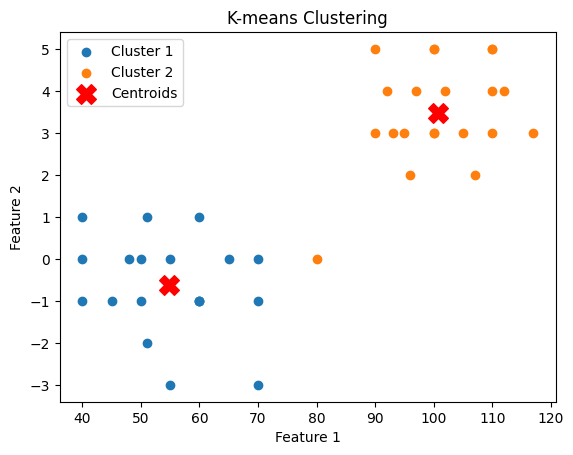

In [8]:
k = 2
centroids, clusters = kmeans(X, k)

for i in range(k):
    cluster_points = [X[j] for j in range(len(X)) if clusters[j] == i]
    plt.scatter([point[0] for point in cluster_points], [point[1] for point in cluster_points], label=f'Cluster {i + 1}')

plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], marker='X', s=200, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [16]:
def calculate_wcss(data, centroids, clusters):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        wcss += sum(get_distance(point, centroids[i]) ** 2 for point in cluster_points)
    return wcss

[[100, 5], [90, 5], [110, 5], [97, 4], [102, 4], [112, 4], [92, 4], [95, 3], [90, 3], [100, 3], [110, 5], [100, 5], [110, 4], [93, 3], [107, 2], [117, 3], [96, 2], [105, 3], [100, 3], [110, 3], [60, -1], [70, -1], [40, 1], [70, -3], [50, -1], [80, 0], [50, 0], [60, -1], [60, 1], [55, 0], [40, -1], [45, -1], [40, 0], [55, -3], [60, -1], [65, 0], [70, 0], [51, -2], [51, 1], [48, 0]]
[[100, 5], [90, 5], [110, 5], [97, 4], [102, 4], [112, 4], [92, 4], [95, 3], [90, 3], [100, 3], [110, 5], [100, 5], [110, 4], [93, 3], [107, 2], [117, 3], [96, 2], [105, 3], [100, 3], [110, 3], [60, -1], [70, -1], [40, 1], [70, -3], [50, -1], [80, 0], [50, 0], [60, -1], [60, 1], [55, 0], [40, -1], [45, -1], [40, 0], [55, -3], [60, -1], [65, 0], [70, 0], [51, -2], [51, 1], [48, 0]]
[[100, 5], [90, 5], [97, 4], [102, 4], [92, 4], [95, 3], [90, 3], [100, 3], [100, 5], [93, 3], [107, 2], [96, 2], [105, 3], [100, 3], [60, -1], [70, -1], [40, 1], [70, -3], [50, -1], [80, 0], [50, 0], [60, -1], [60, 1], [55, 0], [40

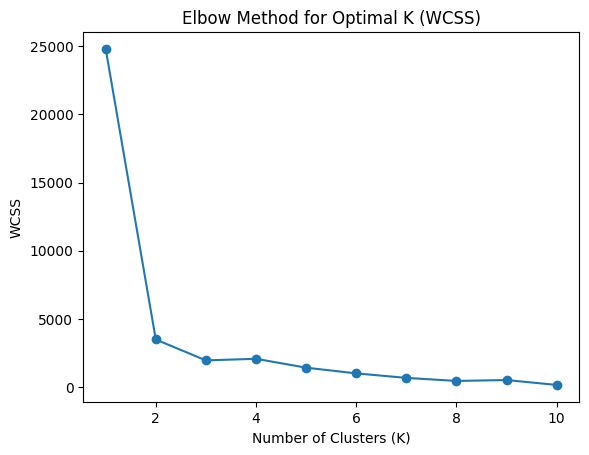

In [17]:
def elbow_method(data, max_k=10):
    wcss_values = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        wcss = calculate_wcss(data, centroids, clusters)
        wcss_values.append(wcss)

    plt.plot(range(1, max_k + 1), wcss_values, marker='o')
    plt.title('Elbow Method for Optimal K (WCSS)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.show()

elbow_method(X)